## 4. Земље са највише (златних) медаља

Тешко је замислити да вам током олимпијских година (било зимских било летњих) промакне информација о одржавању олимпијских игара. Када је једна овако велика међународна манифестација у јеку, референце на олимпијске игре налазе се свуда, од реклама и билборда који најављују спортски догађај, бодре репрезентацију, преко ТВ преноса, до дневних пресека стања који нас обавештавају о (не)успесима. Из дана у дан током трајања игара, може се чути о томе колико медаља је која држава освојила, коме је која медаља умакла, којој медаљи се надамо сутра. Наравно, све се заврши неком бомбастичном информацијом попут "Србија је на 45. месту по броју освојених медаља!" нужно испраћена и коментаром од кога смо све у региону боље прошли. Сјајне спортисткиње и спортисти убрзо бивају заборављени и сви се враћамо својим типичним свакодневницама.

Наш циљ је да у наставку истражимо број медаља (златних, а и осталих) по државама, да видимо како да те податке визуелно комуницирамо и видимо да ли можемо закључити нешто више од тога која земља је која на ранг листи. За пример ћемо користити олимпијске игре 2012 године, али исту анализу можете поновити за било коју годину по вашем избору.

In [1]:
# ucitavanje neophodnih biblioteka

import pandas as pd # učitavanje i obrada tabelarnih podataka
import matplotlib.pyplot as plt # crtanje podataka

Користићемо као и претходно податке о летњим олимпијским играма:

In [2]:
letnje_igre = pd.read_csv('sport_podaci/letnje_olimpijske_igre_do_2014.csv') # citanje lokolne verzije podataka o letnjim olimpijske igre

Кренућемо у истраживање успешности земаља у освајању (златних) медаља на примеру једне манифестације летњих олимпијских игара, на пример за 2012. годину, тако што ћемо издвојити само податке који одговарају тој години:

In [3]:
oigre2012 = letnje_igre[letnje_igre['Year']==2012] # selektujemo samo one redove kojima je u koloni godina broj 2012 i čuvamo tu tabelu kao novu promenljivu
oigre2012.head(2) # pregled prva 2 reda

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,NaN
47,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.0,France,FRA,2012,London,Athletics,"Athletics Men's 1,500 metres",NaN


Сада ће нам највише од користи бити колона о медаљама (`Medal`). За почетак можемо пребројати колико је којих медаља подељено:

In [4]:
oigre2012['Medal'].value_counts()

Bronze    679
Gold      632
Silver    630
Name: Medal, dtype: int64

Постоје 2 необичности у овим бројевима:
- број златних, сребрних и бронзаних медаља није исти 
- број медаља је доста већи од броја који смо видели у прошлоj лекцији.

Видели смо да је на овим олимпијским играма било 303 догађаја у оквиру којих се додељују медаље, међутим, број који смо горе избројали је далеко већи. То је последица тога да ми у табели имамо све добитнике и добитнице медаља, дакле уколико је у питању тимски спорт, сви чланови тима су побројани. То ћемо морати да коригујемо када будемо бројали медаље које је освојила нека држава, нећемо да дајемо предност земљама које освајају медаље у екипним спотовима, већ се победа на сваком догађају броји једнако. Да бисмо то лашке урадили, издвојићемо прво табелу података која садржи само добитнике златних медаља, и ту можемо видети ово о чему смо причали када излистамо почетак табеле која садржи кошаркаше:

In [5]:
zlatne_medalje = oigre2012[oigre2012['Medal']=='Gold'] # selektujemo deo tabele koji sadrži "Gold" u koloni medalja i čuvamo rezultat u novoj promenljivoj
zlatne_medalje[zlatne_medalje.Sport=='Basketball'].head() # izlistavamo prvih 5 redova tavele koja sadrži zlatne medalje, ali i za koje važi da je sport košarka

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
6516,4505,Carmelo Kyan Anthony,M,28.0,203.0,109.0,United States,USA,2012,London,Basketball,Basketball Men's Basketball,Gold
8656,5971,Seimone Delicia Augustus,F,28.0,183.0,74.0,United States,USA,2012,London,Basketball,Basketball Women's Basketball,Gold
17335,11671,"Suzanne Brigit ""Sue"" Bird",F,31.0,175.0,66.0,United States,USA,2012,London,Basketball,Basketball Women's Basketball,Gold
24000,15891,Kobe Bean Bryant,M,33.0,198.0,100.0,United States,USA,2012,London,Basketball,Basketball Men's Basketball,Gold
28556,18811,"Swintayla Marie ""Swin"" Cash",F,32.0,185.0,74.0,United States,USA,2012,London,Basketball,Basketball Women's Basketball,Gold


Претходно нам илуструје да није могуће да само групишемо податке по земљи (националном организационом комитету `NOC`) и проверимо величину подтабеле пошто ћемо тако пројати све појединце који су се вратили кући са медаљом. Такође, не можемо ни само груписати по комитету и бројати различите спортове пошто бисмо тако само једном бројали кошарку, иако у горњем примеру видимо да су САД освојиле медаљу и у мушкој и у женској конкуренцији. 
Стога ћемо као и претходно груписати податке (`groupby`) по држави, а затим у свакој групи избројати различите догађаје. 

In [6]:
zlatne_medalje_po_drzavi = zlatne_medalje.groupby('NOC')['Event'].unique().apply(len) # grupisanje po državi i brojanje jedinstvenih događaja, čuvamo rezultat u novoj tabeli
zlatne_medalje_po_drzavi = zlatne_medalje_po_drzavi.reset_index() # resetujemo indeks da bismo koristili i kolonu sa državama koja je pre ove komande bila indeksna
zlatne_medalje_po_drzavi.head()

,NOC,Event
0,ALG,1
1,ARG,1
2,AUS,7
3,AZE,2
4,BAH,1


Зато што смо бројали јединствене вредности у колони `Event` резултати нашег груписања и бројања су у колони са тим именом па ћемо пре наставка то променити: 

In [7]:
zlatne_medalje_po_drzavi = zlatne_medalje_po_drzavi.rename(columns={'Event':'Broj_zlatnih_medalja'}) # promene imena se prosledjuju u formi recnika {sta_menjamo:cime_menjamo}

Можемо проверити да ли је претходно бројање прошло како треба тако што ћемо излистати 5 земаља са највише златних медаља и упоредити то са подацима које можемо пронаћи на [википедији](https://en.wikipedia.org/wiki/2012_Summer_Olympics_medal_table). То радимо сортирајући податке функцијом `sort_values` наглашавајући по којој колони уз помоћ аргумента `by`. Подразумевани начин сортирања је растући па ако хоћемо само да видимо првих 5 земаља, згодније нам је да користимо опадајуће сортирање `ascending=False` и одаберемо првих 5 вредности:

In [8]:
zlatne_medalje_po_drzavi.sort_values(by='Broj_zlatnih_medalja',ascending=False).head()

,NOC,Broj_zlatnih_medalja
51,USA,46
8,CHN,38
18,GBR,29
41,RUS,24
30,KOR,13


Mожемо проверити и колико уноса има ова наша нова табела, тј. колико земаља је освојило бар једну златну медаљу на посматраним олимпијским играма:

In [9]:
zlatne_medalje_po_drzavi.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   NOC                   54 non-null     object
 1   Broj_zlatnih_medalja  54 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 992.0+ bytes


Где видимо да има 54 земље са бар једном златном медаљом. 

Ако сте пробали да неке од ових података упоредите са подацима на википедији или званичном сајту олимпијских игара вероватно сте наишли на мала неслагања (нпр. Русија је освојила ипак 20 златних медаља по [википедији](https://en.wikipedia.org/wiki/2012_Summer_Olympics_medal_table)). Иако и нас муче та неслагања, уместо одлуке да одустанемо од анализе олимпијада и прогласимо податке непогодним, одлучили смо да наставимо анализу уз објашњење узрока неслагања. Табеле које анализирамо, настале су у аутоматском преузимању података из једне од веб архива историјских успеха на олимпијским играма ([*Sports reference*](https://www.sports-reference.com/)). Међутим, оно што аутори скупа података нису узели у обзир је чињеница да резултати олимпијских игара нису финални, већ су наставили да се "мењају" и након што су табеле података сакупљене и објављене за даљу употребу. Како то да се подаци о прошлим олимпијадама мењају, питаћете се сигурно. Заправо, спортисти могу изгубити своје медаље и више година након одржаних олимпијских игара ако се утврди да су прекршили неко од правила, најчешће у вези са коришћењем недозвољених супстанци. На [овој адреси](https://olympics.com/ioc/news/fight-against-doping) можете видети сапштења о одузимању медаља са олимпијаде из 2012 и додељивању истих другим спортисткињама и спортистима које су се дешавале чак и прошле године! Листу свих одузетих медаља можете наћи [овде](https://en.wikipedia.org/wiki/List_of_stripped_Olympic_medals). Наши подаци садрже имена и остале податке о учесницима олимпијских игара укључујући и информацију да ли су добили одређену медаљу, али скуп података није коригован уколико је више година касније дошло до прерасподеле медаља. Стога ће се неретко дешавати да видите да број медаља неке државе који нађемо у овој радној свесци неће бити потпуно исти као број који можете сада наћи на сајтовима о олимпијским играма. Ово значи да ћемо при извођењу закључака понекад морати да будемо пажљивији, али нам се чинило да процес анализе података и њихове визуализације неће бити мање занимљив упркос "застарелости" неких од података.

Хајде да ову нашу табелицу која садржи само 2 колоне (трословни код државе и број медаља) допунимо и пуним именом државе пошто није увек лако сетити се која комбинација слова представља коју државу. То можемо уз помоћ функцијe [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) и нове табеле која садржи само имена држава и њихове трословне кодове националних комитета. Ту нову табелу правимо тако што одаберемо само колоне `NOC` и `Team` и обришемо сва непотребна понављања функцијом [drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.Series.drop_duplicates.html):

In [10]:
drzave_kodovi = oigre2012[['NOC','Team']].drop_duplicates() # pravimo novu tabelu koja sadrzi samo jedinstvene kombinacije NOC i imena drzave
drzave_kodovi = drzave_kodovi.groupby('NOC').first().reset_index() # neke zemlje imaju vise timova sa dodatim brojem 1,2, tako da obako obezbedjujemo da samo jedan par NOC i Team postoje za svaku zemlju
drzave_kodovi.head()

,NOC,Team
0,AFG,Afghanistan
1,ALB,Albania
2,ALG,Algeria
3,AND,Andorra
4,ANG,Angola


Сада ову табелу можемо искористити да је спојимо (`merge`) са табелом која садржи `zlatne_medalje_po_drzavi`. Функцији прослеђујемо информације које две табеле спајамо и коју колону користимо да спојимо одговарајуће редове. У нашем случају то је колона `NOC` која је заједничка обема табелама:

In [11]:
zlatne_medalje_po_drzavi = pd.merge(zlatne_medalje_po_drzavi,drzave_kodovi,on='NOC') # spajanje dve tabele po koloni 'NOC'
zlatne_medalje_po_drzavi.head()

,NOC,Broj_zlatnih_medalja,Team
0,ALG,1,Algeria
1,ARG,1,Argentina
2,AUS,7,Australia
3,AZE,2,Azerbaijan
4,BAH,1,Bahamas


Како ми не желимо да дискутујемо само о златним медаљама, хајде да сличне табелице направимо и са бројевима освојених сребрних и бронзаних медаља. Не желимо да копирамо код три пута (то јесте релативно мало пута, али ћете можда желети то да поновите и за неке друге податке) па ћемо претходне кораке убацити у једну функцију која ће као улаз користити табелу података и низ карактера који означава који тип медаље хоћете да издвојите `Gold`, `Silver`, `Bronze`, a резултат функције ће бити табела са бројем одабраних медаља по држави:

In [12]:
def prebroj_medalje_po_drzavi(podaci_za_jednu_godinu,tip_medalja):
    """
    podaci_za_jednu_godinu je tabela podataka koji u svakom redu sadrze informacije o sportistima ucesnicima olimpijskih igara
    tip_medalja je string "Gold","Silver","Bronze" tj. govori nam koje medalje hocemo da izdvojimo
    
    ova funkcija kao rezultat vraca tabelicu koja ima kolonu sa troslovnim kodom drzave NOC i kolonu sa brojem medalja "tip_medalja" koje je drzava osvojila
    """
    medalje = podaci_za_jednu_godinu[podaci_za_jednu_godinu['Medal']==tip_medalja]  # selektujemo deo tabele koji sadrži odredjeni tip medalaj u koloni Medal i čuvamo rezultat u novoj promenljivoj

    medalje_po_drzavi = medalje.groupby('NOC')['Event'].unique().apply(len) # grupisanje po državi i brojanje jedinstvenih događaja, čuvamo rezultat u novoj tabeli
    medalje_po_drzavi = medalje_po_drzavi.reset_index() # resetujemo indeks da bismo koristili i kolonu sa državama koja je pre ove komande bila indeksna
    medalje_po_drzavi = medalje_po_drzavi.rename(columns={'Event':tip_medalja}) # menjamo ime kolone u tip medalje koji smo odabrali
    
    return medalje_po_drzavi

У функцију нисмо ставили спајање са колоном која садржи пуне називе држава зато што ћемо сада направити табелице за сваку од медаља па ћемо тек када све то спојимо додати и пуна имена држава. Хајде да проверимо рад функције на примеру првих пет уноса табеле са златним медаљама које смо приказивали и изнад:

In [13]:
prebroj_medalje_po_drzavi(oigre2012,'Gold').head()

,NOC,Gold
0,ALG,1
1,ARG,1
2,AUS,7
3,AZE,2
4,BAH,1


Супер, добили смо исте резултате као и претходно. Хајде да сада резултате функције за златне, сребне и бронзане медаље да сачувамо у појединачним табелама:

In [14]:
zlato = prebroj_medalje_po_drzavi(oigre2012,'Gold') # da dobijemo zlatne medalje koristimo string "Gold"
srebro = prebroj_medalje_po_drzavi(oigre2012,'Silver') # za srebro koristimo "Silver" i cuvamo podatke u promenljivoj srebro
bronza = prebroj_medalje_po_drzavi(oigre2012,'Bronze') # za bronzane medalje koristimo "Bronze"

<details>    
<summary>
    <font color="darkgreen"><b>Како бисте проверили да ли постоје неки бројеви у новонасталим табелама? </b>
</font>
</summary>
Као и до сада, можете искористити фунције `head` (на пример `srebro.head()`) или `info` (на пример `bronza.info()`) да видите број редова и тип података у различитим колонама.

Сада када имамо све три табеле, можемо их спојити у једну заједничку која ће садржати једну колону која одређује државу (трословним кодом) а затим у осталим колонама има број златних, сребрних и бронзаних медаља. То ћемо опет урадити уз помоћ функције `merge`:

In [15]:
sve_medalje = pd.merge(zlato,srebro, on ='NOC') #kao i prethodno, znamo da je kolona NOC zajednicka i nju koristimo da spojimo tabele
sve_medalje.head()

,NOC,Gold,Silver
0,ARG,1,1
1,AUS,7,16
2,AZE,2,2
3,BLR,2,5
4,BRA,3,5


Судећи по првих пет редова, делује да смо добили тип табеле који смо желели, недостаје само да додамо још податке о бронзаним медаљама. Пре додавања бронзаних медаља, хајде да проверимо нову табелу користећи и функцију `info`:

In [16]:
sve_medalje.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 45
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     46 non-null     object
 1   Gold    46 non-null     int64 
 2   Silver  46 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ KB


Ово је необично! Раније смо видели да има 54 земље које су освојиле бар једну златну медаљу, и чак да се десило да је мање земаља освојило сребрну медаљу, очекивали бисмо да се у заједничкој табели налазе барем све земље које имају злато, дакле бар 8 земаља нам недостаје. Када налетите на овако неки проблем, добар алат је враћање на документацију функције коју сте искористили, у овом случају [merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html), и потражите извор проблема. Један добар метод је да обратите пажњу на подразумеване вредности параметара које нисте искористили. 
Читањем документације можемо приметити да смо ми искористили најосновнију верзију функције, тј. покренули смо је са минималним бројем аргумената, а сви остали аргументи су остали подразумевани. Кључни међу њима, аргумент `how` који дефинише *како* се табеле спајају нам је проузроковао проблем. Подразумевани тип спајања је да се у новонасталој табели нађу само они редови код којих држава по којој спајамо (односно `NOC`) постоји и у једној и у другој табели. То значи да је овај први покушај спајања креирао листу земаља које имају бар једну златну и бар једну сребрну медаљу, док све оне које имају или само златне или само сребрне медаље не постоје. То је начин спајања који ће нам бити од користи за неке од примена, али овде није адекватан зато што желимо да бројимо све земље које су биле успешне на олимпијади и то ћемо постићи тако што аргумент `how` добије вредност `outer`. На овај начин државе које су се појавиле у бар једној од табела морају бити и у заједничкој, што је управо оно што одговара нашим питањима.

In [17]:
sve_medalje = pd.merge(zlato,srebro, on ='NOC',how='outer') # spajamo tabele uz pomoc zajednicke kolone NOC ali tako da se sve zemlje (iako postoje samo u jednoj tabeli) nadju u novoj tabeli
sve_medalje.info() # provera velicine novonastale spojene tabele

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NOC     74 non-null     object 
 1   Gold    54 non-null     float64
 2   Silver  66 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.3+ KB


Ово већ више одговара нашим очекивањима - колона са златним медаљама има 54 бројчана уноса, колона са сребрним медаљама има 66, а укупно табела има 74 реда, односно државе.

<details>    
<summary>
       <font color="darkgreen"> <b> Број медаља које је земља освојила мора бити целобројан тј. очекивали бисмо да тип података у колони буде `int` али видимо тип  `float`, да ли знате зашто је то тако?</b>
</font>
</summary>
Када колона садржи не бројчане вредности, тј. `NaN` вредности, библиотека `pandas` такву колону аутоматски третира као `float` тип података. Тако да не брините, није се десило да смо у бројању доделили некој држави 3.2 медаље, већ се просто дешава да су неке земље без златних или сребрних медаља, што поред горње провере можете видети и користећи `sve_medalje.head()`.

На исти начин ћемо сада у табелу `sve_medalje` додати и податке о бронзаним медаљама:

In [18]:
sve_medalje = pd.merge(sve_medalje,bronza, on ='NOC',how='outer') # spajamo tabele uz pomoc zajednicke kolone NOC ali tako da se sve zemlje (iako postoje samo u jednoj tabeli) nadju u novoj tabeli
sve_medalje.info() # provera velicine novonastale spojene tabele

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 84
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NOC     85 non-null     object 
 1   Gold    54 non-null     float64
 2   Silver  66 non-null     float64
 3   Bronze  71 non-null     float64
dtypes: float64(3), object(1)
memory usage: 3.3+ KB


In [19]:
sve_medalje.head() # prvi redovi nove tabele

,NOC,Gold,Silver,Bronze
0,ALG,1.0,NaN,NaN
1,ARG,1.0,1.0,2.0
2,AUS,7.0,16.0,12.0
3,AZE,2.0,2.0,6.0
4,BAH,1.0,NaN,NaN


Попуњавање непостојећих вредности је веома важна тема и у овом курсу ћете се сусретати са њом на различитим местима (видите на пример и у [темату о јавном здрављу]()) где ће се примењивати различите стратегије. Некад је битно оставити `NaN` вредности као подсетник да тај податак не постоји, а некад се подаци допуне уз адекватне претпоставке. Овде на пример је потпуно адекватно све `NaN` вредности заменити 0 зато што знамо да те земље нису освојиле одговарајућу медаљу и `NaN` ознака се појавила само као последица спајања а не губљења или заборављеног уноса податка. Замена `NaN` података може се урадити уз помоћ [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) функције:

In [20]:
sve_medalje = sve_medalje.fillna(0) # sve NaN vrednosti menjamo sa nulom
sve_medalje.head()

,NOC,Gold,Silver,Bronze
0,ALG,1.0,0.0,0.0
1,ARG,1.0,1.0,2.0
2,AUS,7.0,16.0,12.0
3,AZE,2.0,2.0,6.0
4,BAH,1.0,0.0,0.0


Сада када смо решили постојање `NaN` података можемо променити тип колона натраг на очекиване целобројне вредности користећи функцију [astype](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html) са аргументом `int`. Додаћемо такође и колону која садржи укупан број медаља користећи функцију [sum](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html) да саберемо вредности у колонама `Gold`,`Silver` и `Bronze`. Обратите пажњу да смо искористили додатни аргумент `axis=1` да бисмо сабрали вредности табеле у хоризонталном правцу, без овог аргумента, сумирање се врши вертикално тако да бисмо само добили укупан број златних, сребрних и бронзаних медаља за све земље (сетите се, у претходној лекцији смо слично радили са функцијом `max`).

In [21]:
sve_medalje[['Gold','Silver','Bronze']] = sve_medalje[['Gold','Silver','Bronze']].astype(int) # menjamo tip podataka u kolonama u int
sve_medalje['Total'] = sve_medalje[['Gold','Silver','Bronze']].sum(axis=1) # dodajemo novu kolonu 'Total' cija vrednost je zbir brojeva u kolonama 'Gold', 'Silver' i 'Bronze'
sve_medalje.head()

,NOC,Gold,Silver,Bronze,Total
0,ALG,1,0,0,1
1,ARG,1,1,2,4
2,AUS,7,16,12,35
3,AZE,2,2,6,10
4,BAH,1,0,0,1


Можемо да сортирамо ову табелу на пример по укупном броју медаља и видимо почетак такве табеле, тј првих 5 или 10 земаља које су освојиле највише медаља:

In [22]:
sve_medalje = sve_medalje.sort_values(by='Total',ascending=False)
sve_medalje.head(10)

,NOC,Gold,Silver,Bronze,Total
51,USA,46,28,29,103
8,CHN,38,27,23,88
41,RUS,24,26,32,82
18,GBR,29,17,19,65
20,GER,11,19,14,44
27,JPN,7,14,17,38
17,FRA,11,11,13,35
2,AUS,7,16,12,35
30,KOR,13,8,7,28
25,ITA,8,9,11,28


Видимо да је распоред земаља на табели сада мало другачији него када смо гледали само број освојених златних медаља. Прве две државе су и даље исте - Америка и Кина имају и највише златних и највише медаља укупно - али се распоред осталих мења. На пример, Кореја која је пета земља по броју златних медаља је тек 10 на листи ако се посматрају све укупно медаље.

Међутим, људи нису претерано добри у сагледавању информација кроз велике табеле, стога ћемо ове податке и визуелизовати. Једна од погодних могућности за цртање података категоричког типа какви су подаци о државама (колона `NOC`) је да искористимо стубичасти дијаграм тако што ће свакој држави одговарати један стубић, а његова висина ће бити нумеричка колона (број златних или укупни број медаља) коју желимо да представимо.

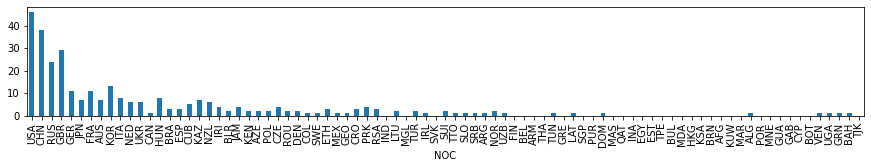

In [23]:
sve_medalje = sve_medalje.set_index('NOC') # postavljamo NOC kolonu za indeksnu
plt.figure(figsize=(15,2)) # biramo velicinu prostora za crtanje 
sve_medalje.Gold.plot(kind='bar') # crtamo kolonu sa zlatnim medaljama
plt.show()

<details>    
<summary>
       <font color="darkgreen"> <b> Шта бисте све поправили код овог графика?
       </b>
</font>
</summary>
Неке од очигледних замерки су: (1) Нема потребе за државама које нису освојиле злато, ако цртамо само график са златним медаљама. (2) Потребно је сортирати податке по колони која ће бити цртана зато што на тај начин и позиција државе у низу (поред висине стубића) комуницира гледаоцу неке информације, нпр. позицију на ранг листи. (3) Само 3 слова по земљи су ок зато што стају лепо испод стубића, али за пуно земаља та три слова нису довољна да се сетимо која земља је у питању, можда би било боље да постоје читава имена држава. (4) Недостаје име у осе, а и име х осе би могло бити боље, и тако даље.
Покушајте да "поправите" овај график уз ове смернице.

Предлажемо да "поравите" горњи график у складу са вашим идејама и замеркама, а ми ћемо кроз цртање у наставку понудити још нека визуелна решења која вам могу помоћи када цртате овакве или сличне податке. На пример, трословни код за сваку земљу очекује да читаоци знају све кодове, што је превелико очекивање и згодније је стубиће означавати са пуним именима држава. Додаћемо колону са именима:

In [24]:
sve_medalje = sve_medalje.reset_index()# da bi kolona 'NOC' opet postala obicna kolona da je iskoristimo za spajanje
sve_medalje = pd.merge(sve_medalje,drzave_kodovi,on='NOC') # spajanje tabela po zajednickoj koloni NOC
sve_medalje.head()

,NOC,Gold,Silver,Bronze,Total,Team
0,USA,46,28,29,103,United States
1,CHN,38,27,23,88,China
2,RUS,24,26,32,82,Russia
3,GBR,29,17,19,65,Great Britain
4,GER,11,19,14,44,Germany


Додатно, није увек неопходно да нацртате баш све податке, можда је згодно фокусирати се на сличности и разлике првих 10 или више држава. Пробаћемо овде са првих 30 (по укупном броју освојених медаља):

In [25]:
top30 = sve_medalje[:30] # izdvajamo prvih 30 zemalja zato što je tabela sve_medalje već sortirana u opadajućem redosledu
top30 = top30.sort_values(by='Total',ascending=True) # okrećemo prvih 30 zemalja da budu u rastućem redosledu zbog crtanja u nastavku
top30.head()

,NOC,Gold,Silver,Bronze,Total,Team
29,SWE,1,4,3,8,Sweden
28,COL,1,3,4,8,Colombia
27,DEN,2,4,3,9,Denmark
26,ROU,2,5,2,9,Romania
25,CZE,4,3,3,10,Czech Republic


Уместо да цртамо само укупан број медаља, или само један тип, на следећем графику, приказаћемо збирно златне, сребнре и бронзане медаље, тако што ћемо на стубићу сваке државе један сегмент обојити у златно и та дужина стубића одговараће броју златних медаља (и слично за све остале) док ће дужина целог стубића одговарати укупном броју медаља одређене државе.

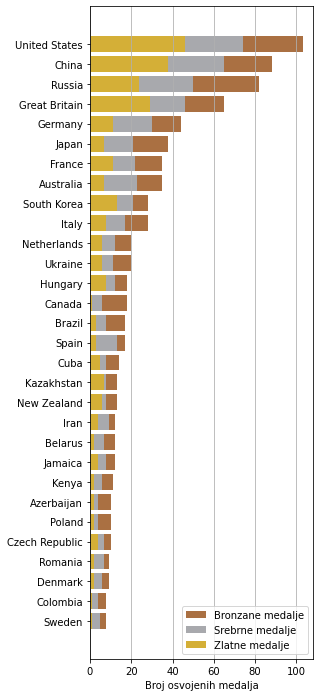

In [26]:
plt.figure(figsize=(4,12)) # dimenzije slike
plt.barh(top30.Team,top30.Total,color='#AA7042',label='Bronzane medalje') # bronzani stubici
plt.barh(top30.Team,top30.Gold+top30.Silver,color='#A8A9AD',label='Srebrne medalje') # srebrni stubici
plt.barh(top30.Team,top30.Gold,color='#D4Af37',label='Zlatne medalje') # zlatni stubici 
plt.grid(axis='x') # dodajemo uspravne sive linije (mrezu da nam pomogne oko ocitavanja duzina stubica)
plt.xlabel('Broj osvojenih medalja') # ime x ose
plt.legend() # dodajemo legendu
plt.show()

Када је сортиран, стубичасти график комуницира са нама као и ранг листа (државе које читамо са леве стране су у оном распореду који одговара њиховом пласману по укупном броју медаља), али уз додатне, визуелне информације. Тако можемо лакше оценити да је Америка освојила више од пет пута више медаља од Холандије или Украине и сл. Додатно, боје делова стубића нам помажу да уочимо да су неке земље освојиле више златних него других медаља (нпр Казакстан), док су неке друге освојиле значајно више сребрних (нпр Шпанија), а неке бронзаних (нпр Канада).

Од додатних поправки које смо искористили да овај график буде бољи, излистаћемо само неке које често могу помоћи у комуникацији:
- Искористили смо хоризонталне стубиће да бисмо лакше могли да читамо имена држава
- Сортирали смо државе по укупном броју медаља
- Фокусирали смо се на део држава 
- Искористили смо стубиће различитих боја који се надовезују један на други да искомуницирамо више информација на графику
- Додали смо усправне линије да још мало помогну у процени дужине стубића

Предност коју добијамо сортирањем у овом случају од користи је само када поредимо државе по њиховом укупном успеху, ако желимо да поредимо државе по питању броја појединачних медаља, то нам је мало теже. Златне медаље можда и најлакше можемо поредити, пошто им је свима почетак поравнат са левом страном. Међутим, када је потребно упоредити број сребрних или бронзаних земаља 2 земље које се не налазе једна поред друге или немају драстично различите вредности то може бити теже. Ако је циљ комуницирати ту инфомацију, згодни су стубичасти дијаграми код којих се сва три типа стубића налазе једни до других а не настављајући се један на други (видите на пример лекцију о ризичним понашањима у сегменту о здрављу), али код њих гледалац у глави треба да сабира дужине стубића тако да постаје недоступна информација о укупном броју медаља.

Надовезујуће стубиће изнад нисмо нацртали користећи надовезујуће стубиће (као што је то урађено аргументом `stacked=True` у лекцији о јавном здрављу) већ смо искористили трик да свако ново цртање додаје објекте једне *преко* других. Тако смо прво нацртали бронзане стубиће чија дужина одговара укупном броју освојених медаља једне земље. Затим смо преко тих стубића нацртали сребрном бојом обојене стубиће у дужини која одговара збиру златних и сребрних медаља. Ови сребрни стубићи тако су прекрили већину претходно нацртаних бронзаних, и остала је тачно дужина која одговара броју освојених бронзаних медаља. Коначно, преко сребрних стубића нацртали смо златне чија дужина одговара броју златних медаља, а непрекривени део дужине сребрних стубића одговара сребрним медаљама.

Можемо додати још мало конктекста који ће нам помоћи да схватимо податке о броју освојених медаља. Наиме, није исто да ли је земља добила једну златну медаљу а послала је на олимпијске игре само репрезентацију која се бори у том једном спорту, или када земља добије једну златну медаљу а опробала се у свим олимпијским дисциплинама. Ово су наравно две екстремне ситуације да нам дочарају специјализовану стратегију "такмичимо се у једној дисциплини и јако смо у њој добри" и "испробавамо све, па шта прође, прође". Хајде да видимо какво је заправо стање међу државама освајачицама медаља, да ли су ближе једној или другој страни.

За то нам је потребно да избројимо тимове тј. различите догађаје на којима се држава такмичила. До сада смо савладали да се то једноставно и лако решава груписањем и бројањем:

In [27]:
broj_timova = oigre2012.groupby('NOC')['Event'].unique().apply(len) # broj jedinstvenih dogadjaja u tabelama sa istim NOC
broj_timova.head()

NOC
AFG     6
ALB     9
ALG    29
AND     6
ANG    10
Name: Event, dtype: int64

Сада ћемо и овај податак придружити табели са медаљама:

In [28]:
sve_medalje = pd.merge(sve_medalje,broj_timova,on='NOC')
sve_medalje.head(2)

,NOC,Gold,Silver,Bronze,Total,Team,Event
0,USA,46,28,29,103,United States,245
1,CHN,38,27,23,88,China,206


Већ у ова прва 2 реда, видимо да су две најуспешније земље (када се гледа укупан број златних, или укупан број медаља) врло добри представници стратегије о којој смо причали - слање пуно тимова из различитих дисциплина (сетимо се, раније смо видели да је укупан број медаља које је могуће освојити, тј. такмичења на овој олимпијади био 303). Да бисмо проверили успешност државе у освајању медаља, можемо увести колону у којој ће сместити израчунат проценат тимова једне земље који се вратио кући са медаљом:

In [29]:
sve_medalje = sve_medalje.rename(columns={'Event':'Broj_timova'}) # menjamo ime kolonе
sve_medalje['Uspesnost_timova'] = 100*sve_medalje['Total']/sve_medalje['Broj_timova'] # dodajemo kolonu o uspesnosti

Можемо упоредно представити визуелно податке о укупном броју медаља, укупном броју златних медаља и успешношћу на још један начин:

<img src="sport_slike/Medalje_2012.png" width="600"/>

Поредећи леви и средњи график, видимо да опадајући редослед у укупном броју медаља врло често одговара и опадајућем редоследу држава у броју освојених златних медаља. Постоје земље које би да смо табелу сортирали по златним медаљама прекочиле које место изнад, али разлике нису превише драматичне (најлакше те државе можете пронаћи пратећи тачкице на средњем дијаграму и обратите пажњу на државе код којих је доња тачкица десно од горње, или горњих тачкица).
Међутим, још много интересантнији је десни низ тачкица на коме видимо државе које су далеко ниже од апсолутних победника у броју медаља или броју златних медаља, али имају далеко већу успешност. Видите на пример Јамајку, Кенију, Етиопију, код којих је скоро сваки други тим (или појединац) који се пласирао на олимпијаду освојио медаљу.

Погледајмо за крај која држава има највећу успешност и који су то тимови и спортови који су тој земљи донели медаље:

In [30]:
maxuspesnost = max(sve_medalje.Uspesnost_timova) # izdvajamo najvecu uspesnost
sve_medalje[sve_medalje.Uspesnost_timova==maxuspesnost] # izdvajamo red tabele koji govori o timu koji je imao najvecu stopu uspesnosti

,NOC,Gold,Silver,Bronze,Total,Team,Broj_timova,Uspesnost_timova
30,ETH,3,1,3,7,Ethiopia,14,50.0


In [31]:
oigre2012[(oigre2012.NOC=='ETH')&(oigre2012.Medal.isin(['Gold','Silver','Bronze']))] # izdvajamo dobitnije medalja iz Etiopije

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
8216,5687,Sofia Assefa Abebe,F,24.0,167.0,52.0,Ethiopia,ETH,2012,London,Athletics,"Athletics Women's 3,000 metres Steeplechase",Bronze
14034,9490,Tariku Bekele Beyecha,M,25.0,173.0,65.0,Ethiopia,ETH,2012,London,Athletics,"Athletics Men's 10,000 metres",Bronze
41381,26980,Meseret Defar Tola,F,28.0,159.0,42.0,Ethiopia,ETH,2012,London,Athletics,"Athletics Women's 5,000 metres",Gold
43483,28313,Tirunesh Dibaba Keneni,F,27.0,166.0,50.0,Ethiopia,ETH,2012,London,Athletics,"Athletics Women's 5,000 metres",Bronze
43484,28313,Tirunesh Dibaba Keneni,F,27.0,166.0,50.0,Ethiopia,ETH,2012,London,Athletics,"Athletics Women's 10,000 metres",Gold
60517,39288,Dejen Gebremeskel,M,22.0,180.0,58.0,Ethiopia,ETH,2012,London,Athletics,"Athletics Men's 5,000 metres",Silver
60647,39396,Erba Tiki Gelana,F,24.0,165.0,48.0,Ethiopia,ETH,2012,London,Athletics,Athletics Women's Marathon,Gold


Видимо да је свих 7 медаља Етиопије у атлетским дисциплинама, од којих је за две заслужна иста особа **Tirunesh Dibaba Keneni**, импресивно!

На крају ове лекције, сачуваћемо податке које смо прикупили анализом у овој лекцији за даљу употребу:

In [32]:
sve_medalje.to_csv('sport_podaci/oi2012_medalje_po_zemljama.csv',index=False)

**Задатак**: Репродукујете последњи график користећи код доступан на [овој адреси](https://seaborn.pydata.org/examples/pairgrid_dotplot.html).

In [33]:
# resenje
# jos malo cu ga uprostiti i izkomentarisati, sad je prilicno bazirano na linku sa minormim izmenama za nase podatke

# # Make the PairGrid
# g = sns.PairGrid(sve_medalje.sort_values(by='Total',ascending=False),
#                  x_vars=['Total','Gold','Uspesnost_timova'], y_vars=["Team"],
#                  height=12, aspect=.2)

# # Draw a dot plot using the stripplot function
# g.map(sns.stripplot, size=10, orient="h", jitter=False,
#        palette="flare_r",linewidth=1, edgecolor="w")

# # # Use the same x axis limits on all columns and add better labels
# # g.set(xlabel="Medalje", ylabel="")

# # Use semantically meaningful titles for the columns
# titles = ["Ukupan broj medalja","Zlatne medalje", "Uspešnost"]

# xlabels = ['Broj medalja','Broj medalja','% timova sa medaljama']

# for ax, title,xlab in zip(g.axes.flat, titles,xlabels):

#     # Set a different title for each axes
#     ax.set(title=title)
    
#     ax.set_xlabel(xlab)

#     # Make the grid horizontal instead of vertical
#     ax.xaxis.grid(False)
#     ax.yaxis.grid(True)

# sns.despine(left=True, bottom=True)
# plt.savefig('sport_slike/Medalje_2012.png',dpi=300,bbox_inches='tight')